In [22]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# This is a setup of the fashion dataset from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [39]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

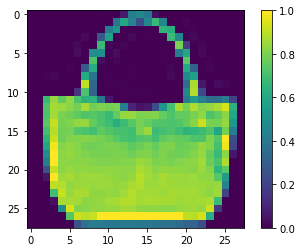

In [57]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

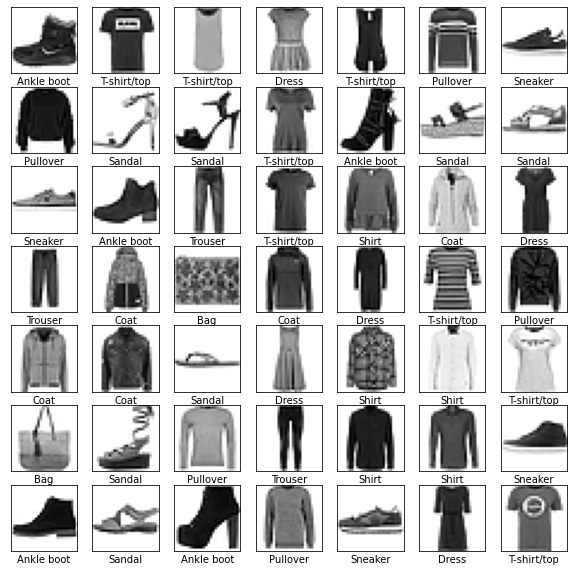

In [45]:
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [34]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.4939 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.3710 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.3336 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.3095 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 2s 816us/step - loss: 0.2935 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.2744 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.2664 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.2555 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.2439 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 2s 843u

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.3188 - accuracy: 0.8907 - 281ms/epoch - 897us/step

Test Accuracy: 0.8906999826431274


In [46]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_images)

In [48]:
predictions[0]

array([6.0455463e-08, 7.1812871e-09, 3.5766522e-08, 1.7731733e-08,
       7.1658704e-08, 6.4099953e-04, 1.7996967e-07, 2.7252069e-02,
       5.2920115e-08, 9.7210658e-01], dtype=float32)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    